<a href="https://colab.research.google.com/github/beyzassevval/beyzassevval/blob/main/Boyut_Azaltma_y%C3%B6ntemleri_ile_%C4%B0R%C4%B0S_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Boyut Azaltma örneği   PCA T-SNE AUTO-ENCODER UMAP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# boyut azlatmadan önce mutlaka standartScaler yapılmalı
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Veri Hazırlığı
iris= load_iris()
X=iris.data
Y=iris.target
feature_names=iris.feature_names
target_names=iris.target_names

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

print(X)
print(X_scaled)
print(Y)
print(feature_names)
print(target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

veri azaltmada veri kaybı olur .
2 azaltma birden(ilk pca sonra umap gibi) kullanılırsa veri daha fazla kaybolur

In [ ]:
# PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled) #yine standartScaler uygulandı
df_pca=pd.DataFrame(data=X_pca,columns=['pca1','pca2'])
df_pca['target']=Y
print(df_pca)
#Özellikler yarı yarıya azaltılmış oldu

         pca1      pca2  target
0   -2.264703  0.480027       0
1   -2.080961 -0.674134       0
2   -2.364229 -0.341908       0
3   -2.299384 -0.597395       0
4   -2.389842  0.646835       0
..        ...       ...     ...
145  1.870503  0.386966       2
146  1.564580 -0.896687       2
147  1.521170  0.269069       2
148  1.372788  1.011254       2
149  0.960656 -0.024332       2

[150 rows x 3 columns]


In [ ]:
# T-SNE
tsne=TSNE(n_components=2,random_state=42)
X_tsne=tsne.fit_transform(X_scaled)
df_tsne=pd.DataFrame(data=X_tsne,columns=['tsne1','tsne2'])
df_tsne['target']=Y
print(df_tsne)
#burda standart scaler yapılmadı yapılsa daha iyi çalışırdı
#yeni nesil yçntemler veriyi daha iyi temsil eder

         tsne1     tsne2  target
0   -24.354542 -0.037451       0
1   -20.484972  0.387902       0
2   -21.595934 -0.422323       0
3   -20.840492 -0.568896       0
4   -24.820669  0.519597       0
..         ...       ...     ...
145  14.319838 -1.641472       2
146   9.778742 -2.477845       2
147  13.226682 -1.325453       2
148  15.004481 -3.265830       2
149   9.578208  1.440250       2

[150 rows x 3 columns]


In [ ]:
# UMAP
umap_model = umap.UMAP(n_components=2,random_state=42)
umap=umap_model.fit_transform(X_scaled)
df_umap=pd.DataFrame(data=umap,columns=['umap1','umap2'])
df_umap['target']=Y
print(df_umap)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


         umap1      umap2  target
0    13.133242  13.727415       0
1    14.917290  15.163956       0
2    15.077888  14.674364       0
3    15.329036  14.839879       0
4    13.161773  13.359106       0
..         ...        ...     ...
145  -2.619084   5.446716       2
146  -1.273612   2.799335       2
147  -2.121136   4.812877       2
148  -3.095827   4.795133       2
149  -0.988331   3.704170       2

[150 rows x 3 columns]


In [ ]:
# AUTO-Encoder
#görüntü işlemede görüntüyü daha iyi hale getirmek içinde kullanılır

#2.4 AutoEncoder
input_dim = X_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(8, activation='relu')(input_layer)
bottleneck = Dense(encoding_dim, activation='linear')(encoder)
decoder = Dense(8, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='linear')(decoder)

from tensorflow.keras.models import Model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=1)

encoder_model = Model(input_layer, bottleneck)
X_autoenc = encoder_model.predict(X_scaled)
df_autoenc = pd.DataFrame(X_autoenc, columns=['AE1', 'AE2'])
df_autoenc['target_name'] = [target_names[i] for i in Y]
print(df_autoenc)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.9680
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6635 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5048 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4430 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3915 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2821 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2755 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2036 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1852 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1841 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1663 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1268 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0898  
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0687 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

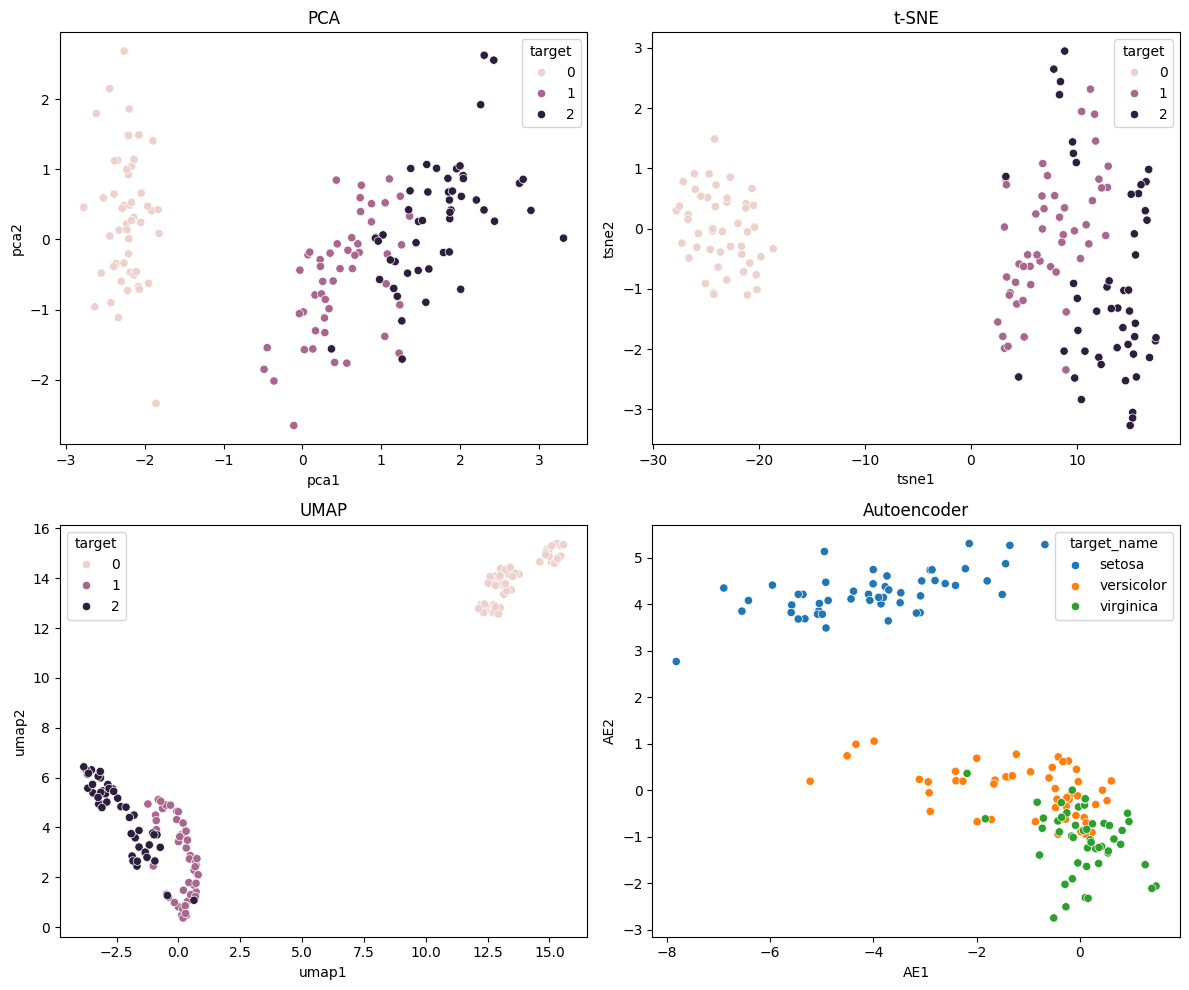

     Algoritma                                               Amaç  \
0          PCA            Varyansı maksimize eden boyutlar bulmak   
1        t-SNE  Yerel komşuluk yapılarını koruyarak görselleşt...   
2         UMAP   Yerel ve global yapıyı koruyarak hızlı indirgeme   
3  Autoencoder  Derin öğrenme ile veriyi latent uzaya sıkıştırmak   

  Lineer/Non-Lineer Global Yapıyı Koruma Yerel Yapıyı Koruma  \
0            Lineer                  İyi                Orta   
1        Non-Lineer                Zayıf             Çok İyi   
2        Non-Lineer                  İyi             Çok İyi   
3        Non-Lineer             Değişken                 İyi   

                              Parametreler  \
0                             n_components   
1        perplexity, n_iter, learning_rate   
2      n_neighbors, min_dist, n_components   
3  katman sayısı, nöron sayısı, aktivasyon   

                                  Uygulama Alanları  
0             Gürültü azaltma, hızlı görselleşti

In [ ]:
# ------------------------
# 6. Görselleştirme
# ------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(ax=axes[0,0], data=df_pca, x='pca1', y='pca2', hue='target')
axes[0,0].set_title("PCA")

sns.scatterplot(ax=axes[0,1], data=df_tsne, x='tsne1', y='tsne2', hue='target')
axes[0,1].set_title("t-SNE")

sns.scatterplot(ax=axes[1,0], data=df_umap, x='umap1', y='umap2', hue='target')
axes[1,0].set_title("UMAP")

sns.scatterplot(ax=axes[1,1], data=df_autoenc, x='AE1', y='AE2', hue='target_name')
axes[1,1].set_title("Autoencoder")

plt.tight_layout()
plt.show()

# ------------------------
# 7. Karşılaştırma Tablosu
# ------------------------
comparison_data = {
    'Algoritma': ['PCA', 't-SNE', 'UMAP', 'Autoencoder'],
    'Amaç': [
        'Varyansı maksimize eden boyutlar bulmak',
        'Yerel komşuluk yapılarını koruyarak görselleştirme',
        'Yerel ve global yapıyı koruyarak hızlı indirgeme',
        'Derin öğrenme ile veriyi latent uzaya sıkıştırmak'
    ],
    'Lineer/Non-Lineer': ['Lineer', 'Non-Lineer', 'Non-Lineer', 'Non-Lineer'],
    'Global Yapıyı Koruma': ['İyi', 'Zayıf', 'İyi', 'Değişken'],
    'Yerel Yapıyı Koruma': ['Orta', 'Çok İyi', 'Çok İyi', 'İyi'],
    'Parametreler': [
        'n_components',
        'perplexity, n_iter, learning_rate',
        'n_neighbors, min_dist, n_components',
        'katman sayısı, nöron sayısı, aktivasyon'
    ],
    'Uygulama Alanları': [
        'Gürültü azaltma, hızlı görselleştirme',
        'Yüksek boyutlu veri görselleştirme',
        'Manifold öğrenme, hız + kalite',
        'Özellik öğrenme, gürültü azaltma, derin modeller'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


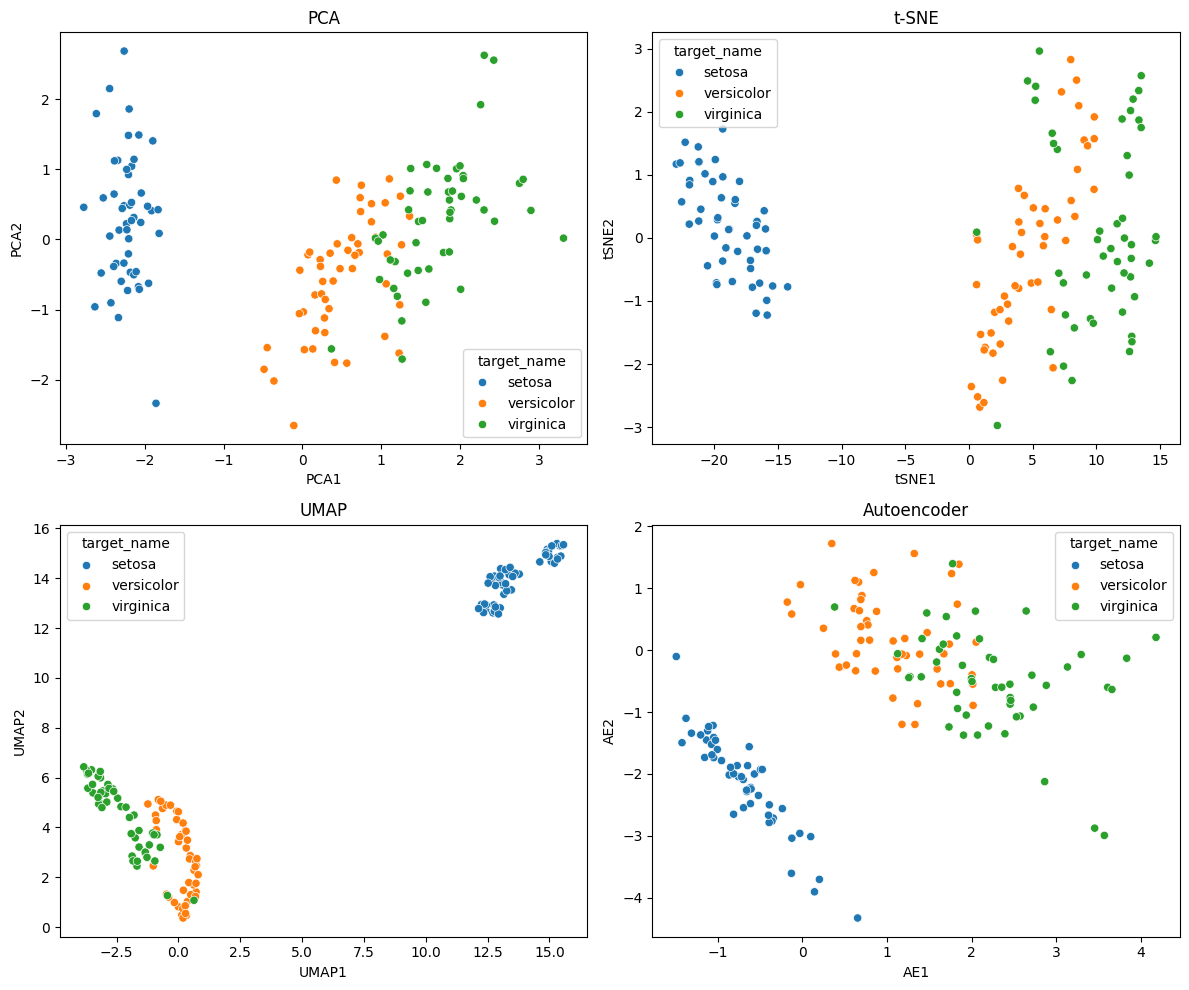

     Algoritma                                               Amaç  \
0          PCA            Varyansı maksimize eden boyutlar bulmak   
1        t-SNE  Yerel komşuluk yapılarını koruyarak görselleşt...   
2         UMAP   Yerel ve global yapıyı koruyarak hızlı indirgeme   
3  Autoencoder  Derin öğrenme ile veriyi latent uzaya sıkıştırmak   

  Lineer/Non-Lineer Global Yapıyı Koruma Yerel Yapıyı Koruma  \
0            Lineer                  İyi                Orta   
1        Non-Lineer                Zayıf             Çok İyi   
2        Non-Lineer                  İyi             Çok İyi   
3        Non-Lineer             Değişken                 İyi   

                              Parametreler  \
0                             n_components   
1        perplexity, n_iter, learning_rate   
2      n_neighbors, min_dist, n_components   
3  katman sayısı, nöron sayısı, aktivasyon   

                                  Uygulama Alanları  
0             Gürültü azaltma, hızlı görselleşti

In [ ]:
# Boyut Azaltma Karşılaştırma: PCA, t-SNE, UMAP, Autoencoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# ------------------------
# 1. Veri Hazırlığı
# ------------------------
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------
# 2. PCA
# ------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['target_name'] = [target_names[i] for i in y]

# ------------------------
# 3. t-SNE
# ------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_scaled)
df_tsne = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])
df_tsne['target_name'] = [target_names[i] for i in y]

# ------------------------
# 4. UMAP
# ------------------------
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['target_name'] = [target_names[i] for i in y]

# ------------------------
# 5. Autoencoder
# ------------------------
input_dim = X_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(8, activation='relu')(input_layer)
bottleneck = Dense(encoding_dim, activation='linear')(encoder)
decoder = Dense(8, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=0)

encoder_model = Model(input_layer, bottleneck)
X_autoenc = encoder_model.predict(X_scaled)
df_autoenc = pd.DataFrame(X_autoenc, columns=['AE1', 'AE2'])
df_autoenc['target_name'] = [target_names[i] for i in y]

# ------------------------
# 6. Görselleştirme
# ------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(ax=axes[0,0], data=df_pca, x='PCA1', y='PCA2', hue='target_name')
axes[0,0].set_title("PCA")

sns.scatterplot(ax=axes[0,1], data=df_tsne, x='tSNE1', y='tSNE2', hue='target_name')
axes[0,1].set_title("t-SNE")

sns.scatterplot(ax=axes[1,0], data=df_umap, x='UMAP1', y='UMAP2', hue='target_name')
axes[1,0].set_title("UMAP")

sns.scatterplot(ax=axes[1,1], data=df_autoenc, x='AE1', y='AE2', hue='target_name')
axes[1,1].set_title("Autoencoder")

plt.tight_layout()
plt.show()

# ------------------------
# 7. Karşılaştırma Tablosu
# ------------------------
comparison_data = {
    'Algoritma': ['PCA', 't-SNE', 'UMAP', 'Autoencoder'],
    'Amaç': [
        'Varyansı maksimize eden boyutlar bulmak',
        'Yerel komşuluk yapılarını koruyarak görselleştirme',
        'Yerel ve global yapıyı koruyarak hızlı indirgeme',
        'Derin öğrenme ile veriyi latent uzaya sıkıştırmak'
    ],
    'Lineer/Non-Lineer': ['Lineer', 'Non-Lineer', 'Non-Lineer', 'Non-Lineer'],
    'Global Yapıyı Koruma': ['İyi', 'Zayıf', 'İyi', 'Değişken'],
    'Yerel Yapıyı Koruma': ['Orta', 'Çok İyi', 'Çok İyi', 'İyi'],
    'Parametreler': [
        'n_components',
        'perplexity, n_iter, learning_rate',
        'n_neighbors, min_dist, n_components',
        'katman sayısı, nöron sayısı, aktivasyon'
    ],
    'Uygulama Alanları': [
        'Gürültü azaltma, hızlı görselleştirme',
        'Yüksek boyutlu veri görselleştirme',
        'Manifold öğrenme, hız + kalite',
        'Özellik öğrenme, gürültü azaltma, derin modeller'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modeller
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', gamma='scale', random_state=42)
}

# Boyut azaltma yöntemleri çıktıları
reduced_data = {
    "PCA": X_pca,
    "t-SNE": X_tsne,
    "UMAP": X_umap,
    "Autoencoder": X_autoenc
}

# Sonuç tablosu
results = []

for method_name, X_red in reduced_data.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_red, y, test_size=0.3, random_state=42, stratify=y
    )
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            "Yöntem": method_name,
            "Model": model_name,
            "Doğruluk (%)": round(acc * 100, 2)
        })

df_results = pd.DataFrame(results)
print("\nSınıflandırma Sonuçları:")
print(df_results.pivot(index='Yöntem', columns='Model', values='Doğruluk (%)'))


Sınıflandırma Sonuçları:
Model          KNN  Random Forest    SVM
Yöntem                                  
Autoencoder  80.00          80.00  80.00
PCA          91.11          86.67  91.11
UMAP         97.78          88.89  84.44
t-SNE        88.89          86.67  75.56
